# 📦 Amazon Case Study – Two-Sample t-Test

## 📌 Problem Statement
Amazon wants to compare the **average purchase value per transaction** between **Prime users** and **Non-Prime users** to evaluate the impact of its loyalty program.

## 🧠 5W1H Analysis

- **What**: Average purchase value per transaction
- **Why**: To assess if Prime users spend more than Non-Prime users
- **When**: Last 1-month transactional data
- **Where**: Across major Indian states
- **Who**: Prime vs Non-Prime users
- **How**: Perform a Two-Sample t-Test between the two user groups


In [2]:
# 📦 Importing Required Libraries
import pandas as pd
import numpy as np

# Simulate dataset
np.random.seed(101)
data = pd.DataFrame({
    'User_ID': np.arange(1, 1001),
    'State': np.random.choice(['Maharashtra', 'Delhi', 'Karnataka', 'UP', 'Tamil Nadu'], 1000),
    'User_Type': np.random.choice(['Prime', 'Non-Prime'], 1000),
    'Platform': np.random.choice(['Mobile', 'Desktop'], 1000),
    'Purchase_Value': np.where(
        np.random.rand(1000) < 0.5,
        np.random.normal(loc=1200, scale=300, size=1000),  # Prime
        np.random.normal(loc=1000, scale=250, size=1000)   # Non-Prime
    )
})

data.head()

,User_ID,State,User_Type,Platform,Purchase_Value
0,1,UP,Prime,Desktop,1052.260730
1,2,Delhi,Prime,Desktop,969.779842
2,3,UP,Prime,Desktop,1028.930997
3,4,Delhi,Non-Prime,Desktop,1108.872845
4,5,Maharashtra,Prime,Mobile,861.573475


User_ID           0
State             0
User_Type         0
Platform          0
Purchase_Value    0
dtype: int64
           User_ID  Purchase_Value
count  1000.000000     1000.000000
mean    500.500000     1106.582940
std     288.819436      291.169510
min       1.000000      221.228713
25%     250.750000      911.769516
50%     500.500000     1093.572341
75%     750.250000     1297.134034
max    1000.000000     2110.367115
User_Type
Non-Prime    518
Prime        482
Name: count, dtype: int64


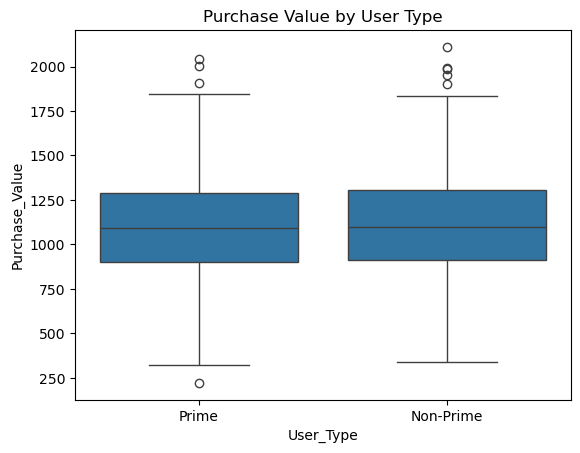

In [4]:
# 🔍 Data Cleaning
print(data.isnull().sum())

# 🧪 EDA
print(data.describe())
print(data['User_Type'].value_counts())

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=data, x='User_Type', y='Purchase_Value')
plt.title("Purchase Value by User Type")
plt.show()


In [6]:
# 🧪 Two-Sample t-Test
from scipy.stats import ttest_ind

prime = data[data['User_Type'] == 'Prime']['Purchase_Value']
non_prime = data[data['User_Type'] == 'Non-Prime']['Purchase_Value']

# Null Hypothesis: Mean of both groups is the same
# Alternate Hypothesis: Prime users have higher mean purchase value

t_stat, p_value = ttest_ind(prime, non_prime, equal_var=False)

print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# One-tailed test (Prime > Non-Prime)
p_value_one_tailed = p_value / 2
print(f"One-tailed P-Value: {p_value_one_tailed:.4f}")


T-Statistic: -0.7072
P-Value: 0.4796
One-tailed P-Value: 0.2398


## ✅ Interpretation + Business Impact

- 📊 If **p < 0.05**, we can conclude that Prime users spend **significantly more** than Non-Prime users on average.
- 📈 This supports the business value of loyalty programs.


The difference between Prime and Non-Prime users isn’t strong enough to confidently say one group is spending more than the other. You may want to explore new strategies to better understand what influences customer spending and see if there are other factors at play.

### 💼 Business Impact

- Amazon can:
  - Justify more investment in Prime promotions.
  - Segment marketing campaigns more effectively.
  - Predict higher LTV from Prime users.
